Matplotlib is building the font cache; this may take a moment.


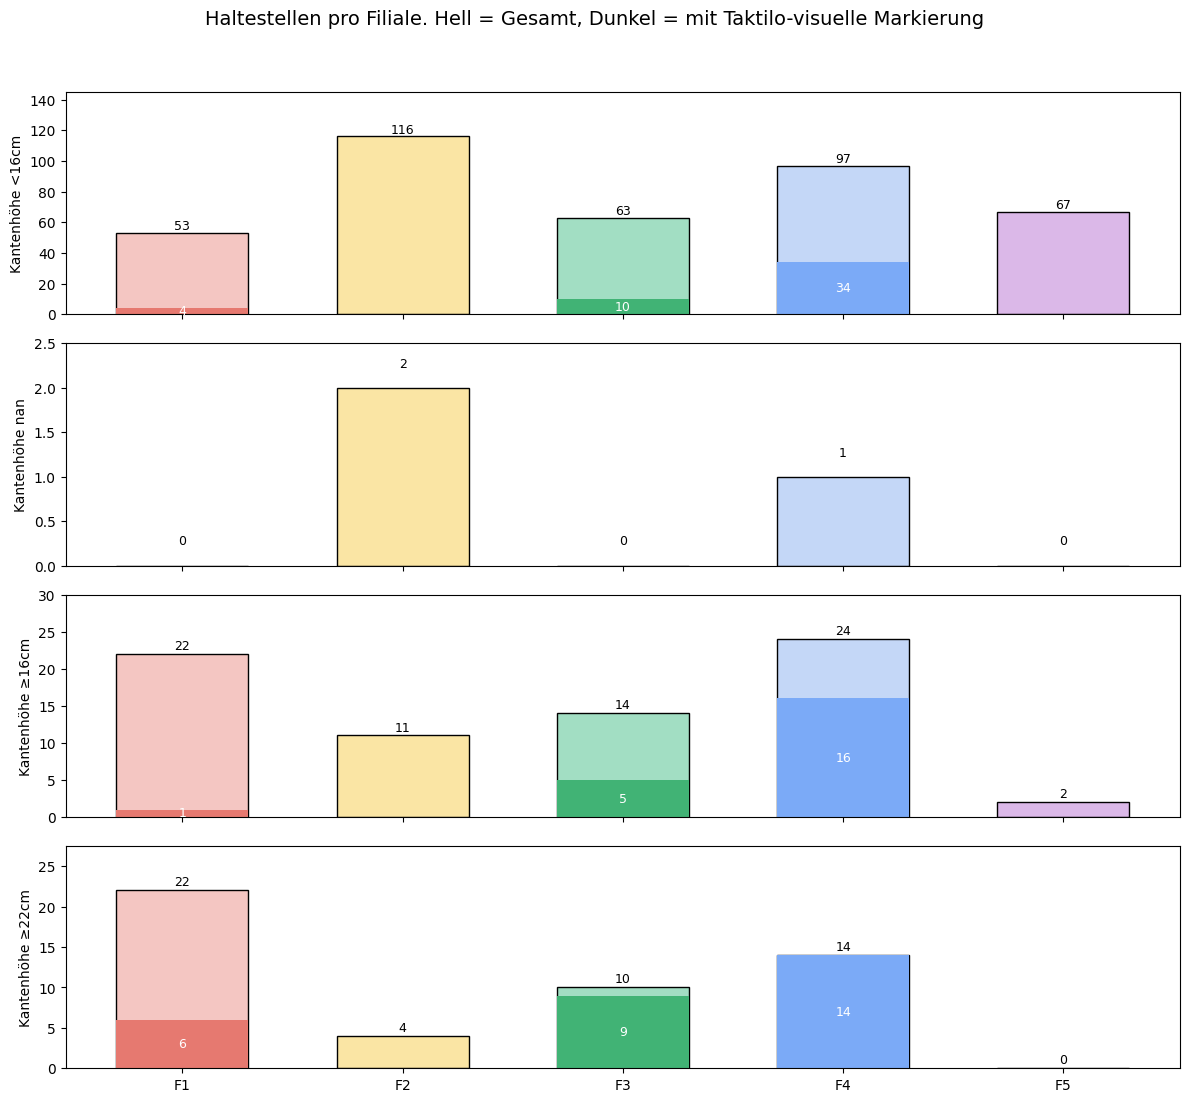

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Einlesen
df = pd.read_csv("ASTRA-Bushaltestellen.csv", delimiter=';')

# Whitespace & Kleinbuchstaben
df["hmin ZAR"] = df["hmin ZAR"].astype(str).str.strip()
df["Filiale"] = df["Filiale"].astype(str).str.strip()
df["Markierung Taktilo-Visuel"] = df["Markierung Taktilo-Visuel"].astype(str).str.strip().str.lower()

# Zählen
gesamt = df.groupby(["hmin ZAR", "Filiale"]).size().unstack(fill_value=0)
nein = df[df["Markierung Taktilo-Visuel"] == "ja"]
nein_counts = nein.groupby(["hmin ZAR", "Filiale"]).size().unstack(fill_value=0).reindex_like(gesamt).fillna(0).astype(int)

# Farbdefinitionen
farben_gesamt = {
    "F1": "#F4C6C2",
    "F2": "#FAE5A4",
    "F3": "#A2DEC3",
    "F4": "#C4D7F7",
    "F5": "#DBB8E8"
}
farben_nein = {
    "F1": "#E67970",
    "F2": "#F7CB4D",
    "F3": "#41B375",
    "F4": "#7BAAF7",
    "F5": "#BA67C8"
}

# Plot
fig, axes = plt.subplots(nrows=len(gesamt.index), figsize=(12, 2.8 * len(gesamt.index)), sharex=True)
if len(gesamt.index) == 1:
    axes = [axes]

for i, hmin in enumerate(gesamt.index):
    ax = axes[i]
    labels = gesamt.columns
    x = np.arange(len(labels))
    width = 0.6

    for j, filiale in enumerate(labels):
        total_val = gesamt.loc[hmin, filiale]
        nein_val = nein_counts.loc[hmin, filiale]

        # Gesamt (hell)
        ax.bar(x[j], total_val, width=width, color=farben_gesamt.get(filiale, "lightgray"), edgecolor="black")

        # nein (dunkel)
        if nein_val > 0:
            ax.bar(x[j], nein_val, width=width, color=farben_nein.get(filiale, "tomato"))

        # Beschriftungen
        ax.text(x[j], total_val + 0.2, str(total_val), ha='center', va='bottom', fontsize=9)
        if nein_val > 0:
            ax.text(x[j], nein_val / 2, str(nein_val), ha='center', va='center', fontsize=9, color='white')

    ax.set_ylabel(f"Kantenhöhe {hmin}")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, max(gesamt.loc[hmin]) * 1.25)

plt.suptitle("Haltestellen pro Filiale. Hell = Gesamt, Dunkel = mit Taktilo-visuelle Markierung", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('filialen_Markierung.jpg', dpi=300)  # dpi für gute Qualität
plt.show()
